In [67]:
import sys
import pickle

# PCA Explained 

In [343]:
df = pd.DataFrame(
    {
        'x1': np.random.normal(loc=10.0, scale=5.0, size=8),
        'noise': np.random.normal(loc=0.0, scale=1.0, size=8),
    }
)

df['x2'] = 3 * df['x1'] + df['noise'] 

In [344]:
df[['x1', 'x2']]

,x1,x2
0,9.259916,28.129327
1,7.021191,23.122587
2,9.744407,29.393867
3,15.047500,44.300523
4,1.782589,6.445454
5,9.014174,26.074613
6,16.200623,48.464456
7,17.430507,52.386115


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


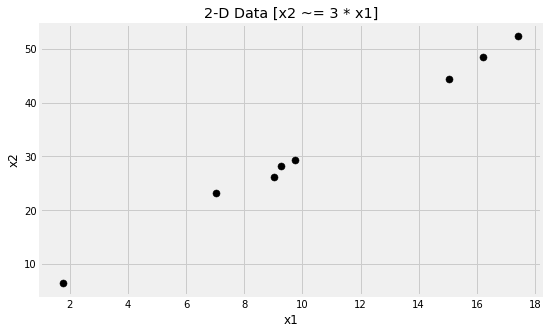

In [346]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

df.plot(
    title='2-D Data [x2 ~= 3 * x1]',
    kind='scatter', x='x1', y='x2', ax=ax, color='k', s=50
)

fig.show()

In [347]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler(with_std=False)

x = scaler.fit_transform(df[['x1', 'x2']])
# x = df[['x1', 'x2']]

pca = PCA(n_components=1)

pca.fit_transform(x)

array([[  4.39844497],
       [  9.86130961],
       [  3.04505968],
       [-12.77599281],
       [ 27.33532988],
       [  6.4211826 ],
       [-17.08846618],
       [-21.19686776]])

In [348]:
pca.explained_variance_

array([259.8378359])

In [349]:
pca.components_

array([[-0.32565021, -0.94549032]])

In [350]:
c2_slope

-3.002399311612603

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


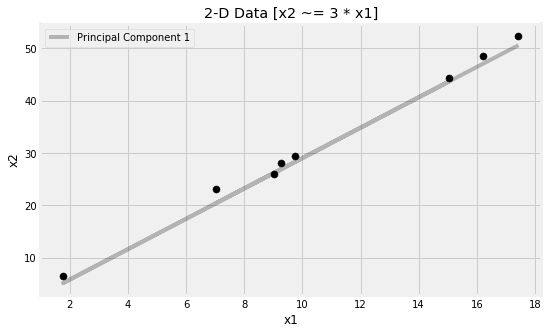

In [353]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

df.plot(
    title='2-D Data [x2 ~= 3 * x1]',
    kind='scatter', x='x1', y='x2', ax=ax, color='k', s=50
)

c1_slope = pca.components_[0][1] / pca.components_[0][0]
c1 = np.array([
    [x1, x1 * c1_slope]
    for x1 in df['x1'].values
])
ax.plot(c1[:,0], c1[:,1], '-k', alpha=0.25, label='Principal Component 1')

ax.legend()

fig.show()

In [307]:
from sklearn.datasets import load_digits

digits = load_digits()

In [308]:
digits['data'].min(), digits['data'].max()

(0.0, 16.0)

In [309]:
def display_img(img, target, ax):
    img = img.reshape((8, 8))
    
    ax.imshow(img, cmap='gray',)
    ax.set_title(f'Digit: {str(target)}')
    ax.grid(False)

In [310]:
from sklearn.model_selection import train_test_split

x, y = digits['data'], digits['target']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [311]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


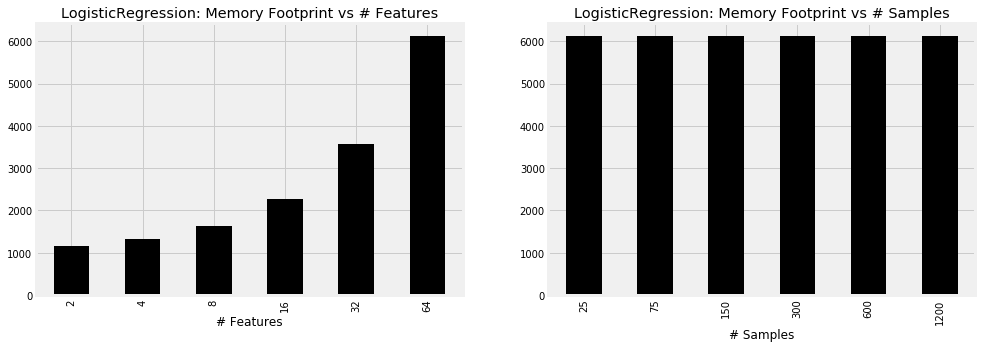

In [312]:
import sys
import pickle
import warnings

from sklearn.linear_model import LogisticRegression

sizes = []

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i in [2, 4, 8, 16, 32, 64]:
    
    clf = LogisticRegression()
    with warnings.catch_warnings(record=True) as w:
        clf.fit(x_train[:,:i], y_train)
    sizes.append(
        [i, sys.getsizeof(pickle.dumps(clf))]
    )
    
pd.DataFrame(
    sizes,
    columns=['# Features', 'Memory Footprint']
).set_index('# Features')['Memory Footprint'].plot(
    title='LogisticRegression: Memory Footprint vs # Features',
    kind='bar',
    color='k',
    ax=axs[0]
)


sizes = []

for i in [25, 75, 150, 300, 600, 1200]:
    
    clf = LogisticRegression()
    with warnings.catch_warnings(record=True) as w:
        clf.fit(x_train[:i,:], y_train[:i])
    sizes.append(
        [i, sys.getsizeof(pickle.dumps(clf))]
    )
    
pd.DataFrame(
    sizes,
    columns=['# Samples', 'Memory Footprint']
).set_index('# Samples')['Memory Footprint'].plot(
    title='LogisticRegression: Memory Footprint vs # Samples',
    kind='bar',
    color='k',
    ax=axs[1]
)

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


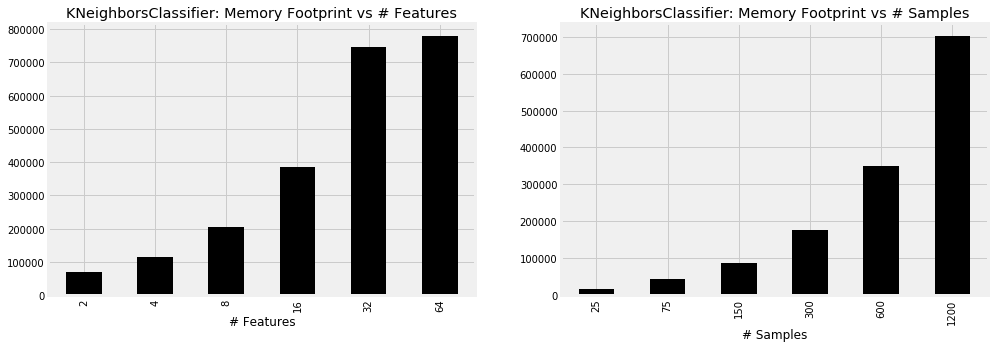

In [313]:
import sys
import pickle

from sklearn.neighbors import KNeighborsClassifier

sizes = []

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i in [2, 4, 8, 16, 32, 64]:
    
    clf = KNeighborsClassifier()
    clf.fit(x_train[:,:i], y_train)
    sizes.append(
        [i, sys.getsizeof(pickle.dumps(clf))]
    )
    
pd.DataFrame(
    sizes,
    columns=['# Features', 'Memory Footprint']
).set_index('# Features')['Memory Footprint'].plot(
    title='KNeighborsClassifier: Memory Footprint vs # Features',
    kind='bar',
    color='k',
    ax=axs[0]
)


sizes = []

for i in [25, 75, 150, 300, 600, 1200]:
    
    clf = KNeighborsClassifier()
    clf.fit(x_train[:i,:], y_train[:i])
    sizes.append(
        [i, sys.getsizeof(pickle.dumps(clf))]
    )
    
pd.DataFrame(
    sizes,
    columns=['# Samples', 'Memory Footprint']
).set_index('# Samples')['Memory Footprint'].plot(
    title='KNeighborsClassifier: Memory Footprint vs # Samples',
    kind='bar',
    color='k',
    ax=axs[1]
)

fig.show()

In [314]:
parameters = {'metric':('manhattan','euclidean', 'cosine'), 'n_neighbors': range(3, 15)}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=parameters, scoring='accuracy', cv=5)

clf.fit(x_train, y_train)

y_test_pred = clf.predict(x_test)

print(
    'MNIST test accuracy score: {:.1%} [k={}, metric={}, memory footprint={}]'.format(
        accuracy_score(y_test, y_test_pred), 
        clf.best_params_['n_neighbors'], 
        clf.best_params_['metric'], 
        sys.getsizeof(pickle.dumps(clf))
    )

)

MNIST test accuracy score: 98.4% [k=5, metric=euclidean, memory footprint=785214]


Calculating Rand ..
Calculating PCA ..
Calculating NCA ..


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


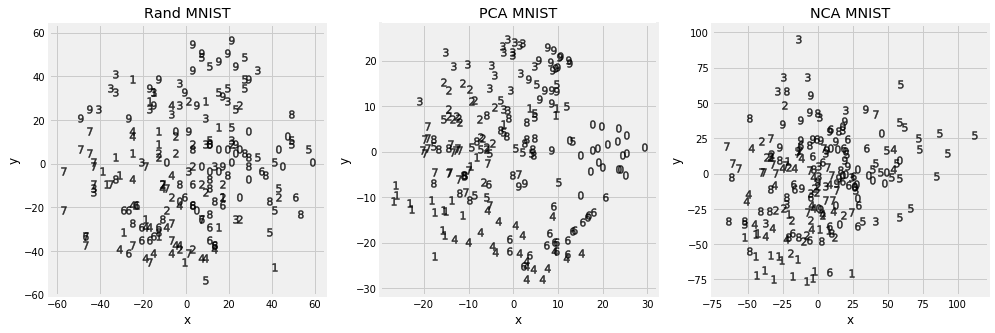

In [315]:
from sklearn.preprocessing import StandardScaler

from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA
from sklearn.neighbors import NeighborhoodComponentsAnalysis

methods = {
    'Rand': SparseRandomProjection(n_components=2),
    'PCA': PCA(n_components=2),
    'NCA': NeighborhoodComponentsAnalysis(n_components=2, init='random'),

}

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (method_name, method_obj) in enumerate(methods.items()):
    
    scaler = StandardScaler(with_std=False)
    x_train_scaled = scaler.fit_transform(x_train)
    
    method_obj.fit(x_train_scaled, y_train)
    x_train_2d = method_obj.transform(x_train_scaled)
    
    # print(f'Calculating {method_name} ..')
    
    for target in set(y_train):
        pd.DataFrame(
            x_train_2d[
                y_train == target
            ],
            columns=['y', 'x']
        ).sample(n=20).plot(
            kind='scatter',
            x='x',
            y='y',
            marker=f'${target}$',
            s=64,
            color='k',
            alpha='0.75',
            ax=axs[i],
        )
        axs[i].set_title(f'{method_name} MNIST')

fig.show()

In [316]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.manifold import LocallyLinearEmbedding

from sklearn.manifold import MDS

n_components = 6

methods = {
    'Rand': SparseRandomProjection(n_components=n_components),
    'PCA': PCA(n_components=n_components),
    'NCA': NeighborhoodComponentsAnalysis(n_components=n_components, init='pca',),
}

for i, (method_name, method_obj) in enumerate(methods.items()):
    
    scaler = StandardScaler(with_std=False)

    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.fit_transform(x_test)
    
    method_obj.fit(x_train_scaled, y_train)
    x_train_2d = method_obj.transform(x_train_scaled)
    x_test_2d = method_obj.transform(x_test_scaled)

    scaler = MinMaxScaler()

    x_train_scaled = scaler.fit_transform(x_train_2d)
    x_test_scaled = scaler.transform(x_test_2d)

    parameters = {'metric':('manhattan','euclidean'), 'n_neighbors': range(3, 9)}

    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, param_grid=parameters, scoring='accuracy', cv=5)

    clf.fit(x_train_scaled, y_train)

    y_test_pred = clf.predict(x_test_scaled)
    
    print(
        'MNIST test accuracy score: {:.1%} [k={}, metric={}, memory footprint={} - {}]'.format(
            accuracy_score(y_test, y_test_pred), 
            clf.best_params_['n_neighbors'], 
            clf.best_params_['metric'], 
            sys.getsizeof(pickle.dumps(clf)),
            method_name
        )

    )

MNIST test accuracy score: 72.7% [k=6, metric=euclidean, memory footprint=163671 - Rand]
MNIST test accuracy score: 93.3% [k=5, metric=euclidean, memory footprint=98957 - PCA]
MNIST test accuracy score: 94.9% [k=3, metric=euclidean, memory footprint=98957 - NCA]


## Nearest Centroid

In [354]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()

clf.fit(x_train, y_train)

y_test_pred = clf.predict(x_test)

print(
    'MNIST test accuracy score: {:.1%}'.format(
        accuracy_score(y_test, y_test_pred), 
    )

)

MNIST test accuracy score: 92.0%


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


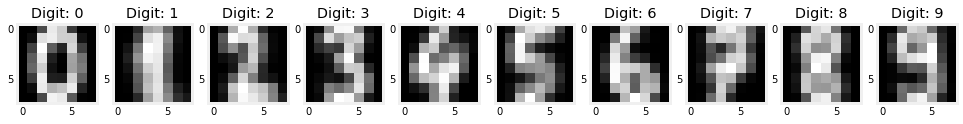

In [357]:
fig, axs = plt.subplots(1, len(clf.classes_), figsize=(15, 5))

for i, (centroid, label) in enumerate(zip(clf.centroids_, clf.classes_)):
    display_img(centroid, label, axs[i])
    
fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


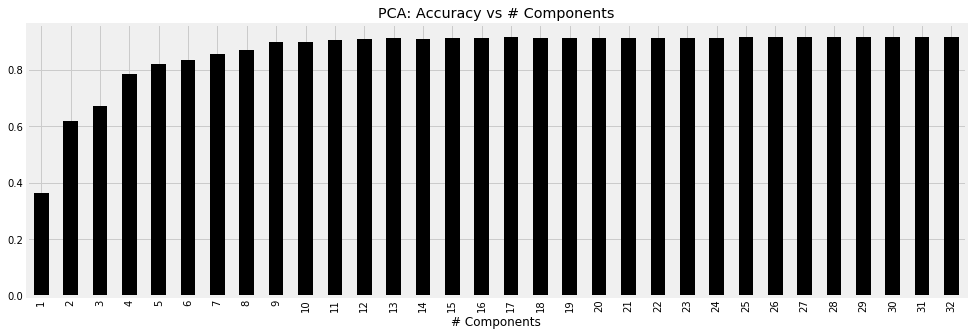

In [318]:
from sklearn.neighbors import NearestCentroid

scores = []

for n_components in range(1, 33, 1):
    
    scaler = StandardScaler(with_std=False)
    embedder = PCA(n_components=n_components)
    
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    clf = NearestCentroid(shrink_threshold=0.01)

    embedder.fit(x_train_scaled, y_train)
    x_train_embed = embedder.transform(x_train_scaled)
    x_test_embed = embedder.transform(x_test_scaled)

    clf.fit(x_train_embed, y_train)

    y_test_pred = clf.predict(x_test_embed)

    scores.append([n_components, accuracy_score(y_test, y_test_pred)])
    

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

pd.DataFrame(
    scores,
    columns=['# Components', 'Accuracy']
).set_index(
    '# Components'
)['Accuracy'].plot(
    title='{}: Accuracy vs # Components'.format(str(embedder).split('(')[0]),
    kind='bar',
    color='k',
    ax=ax
)

fig.show()

In [319]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler(with_std=False)

pca = PCA()

x_train_scaled = scaler.fit_transform(x_train)
pca.fit(x_train_scaled)

df_explained_variance_ratio = pd.DataFrame(
    [
        (component, explained_variance_ratio) 
        for component, explained_variance_ratio in enumerate(pca.explained_variance_ratio_[:32], 1)
    ],
    columns=['component', 'explained_variance_ratio']
)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


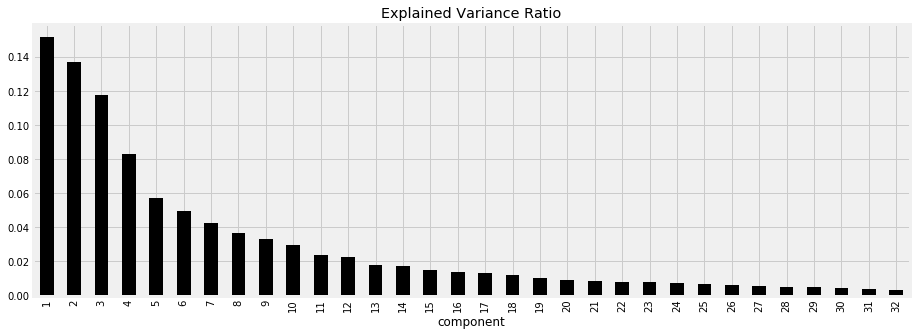

In [320]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))

df_explained_variance_ratio.set_index('component')['explained_variance_ratio'].plot(
    title='Explained Variance Ratio',
    kind='bar',
    color='k',
    ax=ax
)

fig.show()

In [370]:
embedder = PCA(n_components=8)
embedder.fit(x_train, y_train)

x_train_embed = embedder.transform(x_train_scaled)
x_test_embed = embedder.transform(x_test_scaled)

# from sklearn.preprocessing import MinMaxScaler

# iscaler = MinMaxScaler((x_train.min(), x_train.max()))

x_train_restored = embedder.inverse_transform(x_train_embed) 
x_test_restored = embedder.inverse_transform(x_test_embed)

# x_train_restored = iscaler.fit_transform(x_train_restored) 
# x_test_restored = iscaler.fit_transform(x_test_restored)

In [371]:
x_train

array([[ 0.,  0., 10., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 15.,  2.,  0.],
       [ 0.,  0.,  7., ..., 16., 12.,  1.],
       ...,
       [ 0.,  0.,  7., ..., 14.,  5.,  0.],
       [ 0.,  0., 10., ..., 16., 14.,  0.],
       [ 0.,  0.,  4., ...,  8.,  0.,  0.]])

In [372]:
x_train_restored

array([[ 7.76247253e-15,  9.57693785e-01,  1.07031876e+01, ...,
        -9.62274865e-01,  2.34629056e+00,  7.39844511e-01],
       [ 3.45586301e-15, -1.44322495e-01,  1.00002136e+00, ...,
         1.40294275e+01,  7.63750489e+00,  1.22510537e+00],
       [ 4.33445785e-15,  3.90908358e-01,  8.49102874e+00, ...,
         1.28280401e+01,  7.97652948e+00,  2.03724423e+00],
       ...,
       [ 3.90327887e-15,  4.66054937e-01,  9.20153599e+00, ...,
         1.28607258e+01,  8.24543886e+00,  2.14779486e+00],
       [ 4.23419831e-15,  9.14565196e-01,  1.15170755e+01, ...,
         1.18160157e+01,  1.06298947e+01,  3.34316636e+00],
       [ 2.38083023e-15,  1.88077886e-01,  3.81766760e+00, ...,
         6.13359366e+00,  4.82604366e+00,  1.32957906e+00]])

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


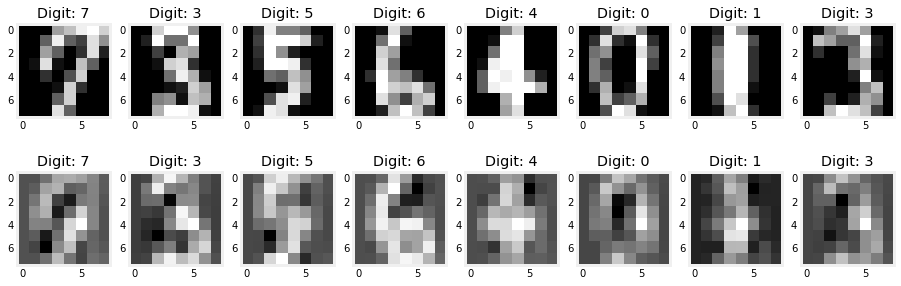

In [373]:
import random 

fig, axs = plt.subplots(2, 8, figsize=(14, 5))

for i in range(8):
    
    rand = random.choice(range(y_train.shape[0]))

    img_orig = x_train[rand]
    img_comp = x_train_restored[rand]
    
    display_img(img_orig, y_train[rand], axs[0][i])
    display_img(img_comp, y_train[rand], axs[1][i])


fig.show()

In [376]:
parameters = {'metric':('manhattan','euclidean'), 'n_neighbors': range(2, 22)}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=parameters, scoring='accuracy', cv=5)

clf.fit(x_train, y_train)

y_test_pred = clf.predict(x_test)

print(
    'MNIST test accuracy score: {:.1%}'.format(
        accuracy_score(y_test, y_test_pred), 
    )

)
print(clf.best_params_)

MNIST test accuracy score: 98.4%
{'metric': 'euclidean', 'n_neighbors': 5}


In [377]:
x_train_expanded = np.concatenate([x_train, x_train_restored])
y_train_expanded = np.concatenate([y_train, y_train])

parameters = {'metric':('manhattan','euclidean'), 'n_neighbors': range(2, 22)}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=parameters, scoring='accuracy', cv=5)

clf.fit(x_train_expanded, y_train_expanded)

y_test_pred = clf.predict(x_test)

print(
    'MNIST test accuracy score: {:.1%}'.format(
        accuracy_score(y_test, y_test_pred), 
    )
)
print(clf.best_params_)

MNIST test accuracy score: 98.2%
{'metric': 'manhattan', 'n_neighbors': 3}
